# **Waze Project**


Dataset taken from Google Advanced Data Analytics course, generated by Waze. Data is not real.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Regression and data modelling libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

pd.set_option('display.max_columns', None)

In [2]:
# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

# Backup dataset with original unmodified data
df0 = df

### **EDA**

#### **Descriptive Statistics**

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Label column has null values

Find out if this is a random or non-random error

In [5]:
null_df = df[df['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [6]:
not_null_df = df[~df['label'].isnull()]
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Mean and standard deviation is similar for both dataframes

In [7]:
null_df['device'].value_counts(normalize=True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

In [8]:
not_null_df['device'].value_counts(normalize=True)

iPhone     0.64515
Android    0.35485
Name: device, dtype: float64

Device ratio is also similar, therefore there is nothing that suggests that the missing label values are from a non-random error. Therefore, they can be dropped.

In [9]:
df = not_null_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14299 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14299 non-null  int64  
 3   drives                   14299 non-null  int64  
 4   total_sessions           14299 non-null  float64
 5   n_days_after_onboarding  14299 non-null  int64  
 6   total_navigations_fav1   14299 non-null  int64  
 7   total_navigations_fav2   14299 non-null  int64  
 8   driven_km_drives         14299 non-null  float64
 9   duration_minutes_drives  14299 non-null  float64
 10  activity_days            14299 non-null  int64  
 11  driving_days             14299 non-null  int64  
 12  device                   14299 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [10]:
# Median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


As expected, the retained users have more activity days and driving days, however these relationships should be further investigated.

#### **Drives and Sessions**

Text(0.5, 1.0, 'Sessions Box Plot')

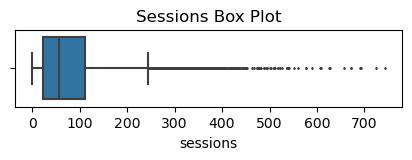

In [11]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('Sessions Box Plot')

The boxplot shows several outliers as high as 700+ sessions, a histogram will provide more information on distribution

In [12]:
def histogram_creator(column, median_text=True, **kwargs):    # **kwargs = any keyword arguments
    # Function to produce quick histograms for EDA
    median=round(df[column].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column], **kwargs)
    plt.axvline(median, color='red', linestyle='--')
    
    # Add median line
    if median_text==True:
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column} histogram')

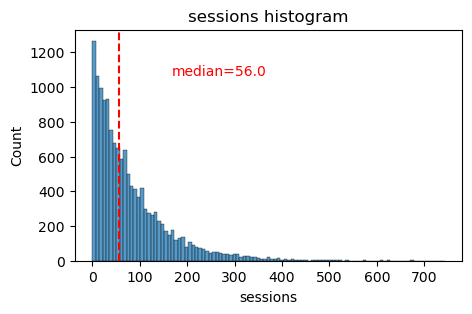

In [13]:
histogram_creator('sessions')

Histogram is showing a strong positive skew for sessions with half the values below 56.

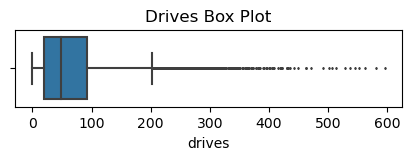

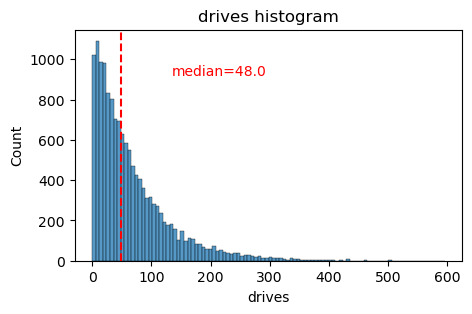

In [14]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('Drives Box Plot')

histogram_creator('drives')

Drives show a similar pattern, as expected

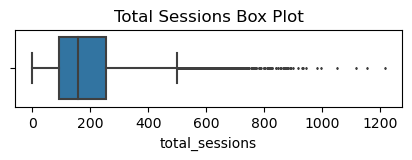

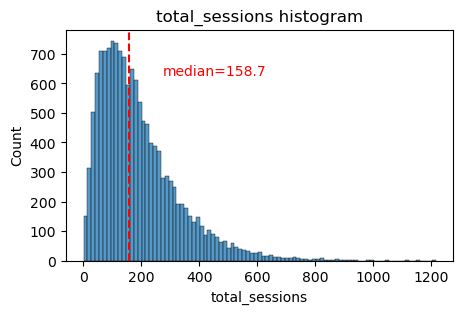

In [15]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('Total Sessions Box Plot')

histogram_creator('total_sessions')

Total sessions with a similar pattern

Overall, it seems like this dataset includes some very heavy drivers. It is also interesting to note that the the median for sessions this month is 56 and the total sessions median is 159.6, suggesting that a large proportion of drives ocurred in this last month.

Median: 1749.0


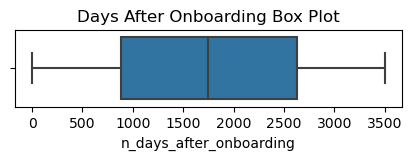

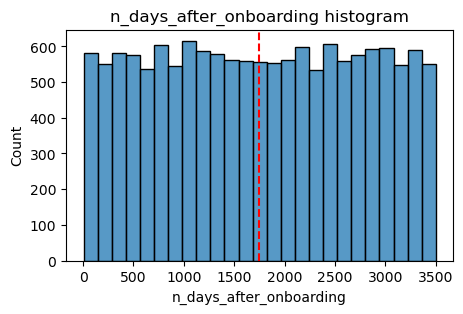

In [16]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('Days After Onboarding Box Plot')

histogram_creator('n_days_after_onboarding', median_text=False)

Number of days after onboarding shows a uniform distribution, suggesting that there is no relationship between how long a user has been on the app and how long before they stop using the app.

Median: 3496.5


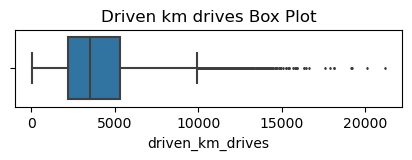

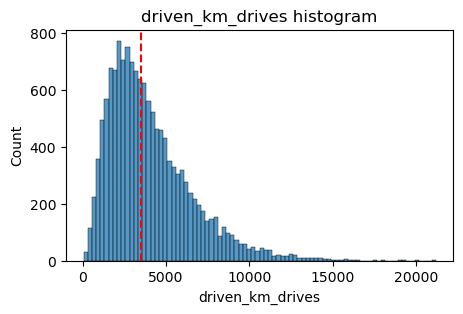

In [17]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('Driven km drives Box Plot')

histogram_creator('driven_km_drives', median_text=False)

Similar to session, drives and total sessions, this shows a positive skew and once again highlights that the users are driving a lot.

#### **App Activity**

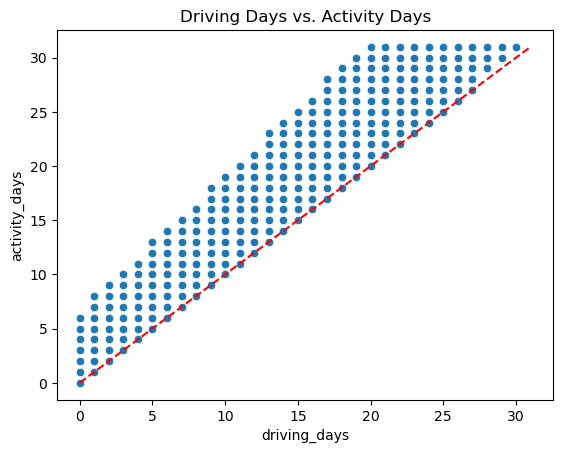

In [18]:
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('Driving Days vs. Activity Days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

By default, there cannot be more activity days than driving days for each user. The scatter plot confirms that there are no such data points in this dataset, as there are no points on the right side of the red line.

Median: 16.0


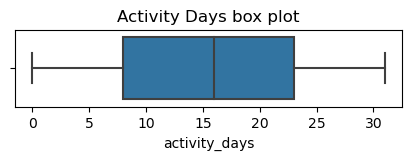

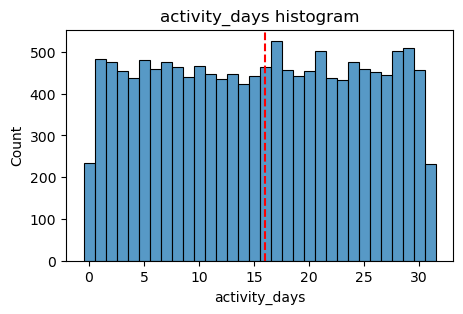

In [19]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('Activity Days box plot')

histogram_creator('activity_days', median_text=False, discrete=True)

The median activity days is 16 and the distribution is uniform, with nearly 500 users on the app for each day count. There are ~250 users who don't use the app once and ~250 who used it everyday.

It is interesting to note that the distribution is different from the sessions distribution, suggesting that there is little correlation between the two.

Median: 12.0


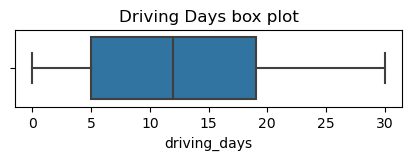

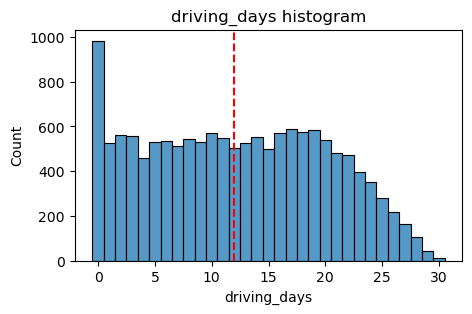

In [20]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('Driving Days box plot')

histogram_creator('driving_days', median_text=False, discrete=True)

The number of driving days shows a generally uniform distribution, apart from a large number of users who do not drive (1000) and that after 20 driving days the count tails off.

This distribution does not match the activity distribution, which is unexpected. This relationship can be further explored.

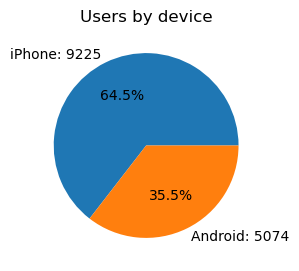

In [21]:
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users.

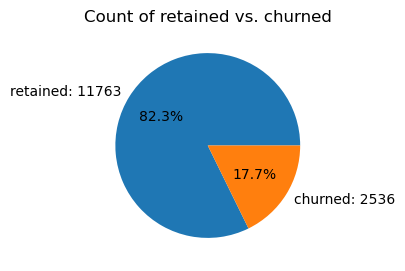

In [22]:
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

More than 80% of users were retained.

### **Analysis**

#### **Retention Rate**

As seen earlier, 82.3% of users were retained. This section will delve further into how each group differs.

In [23]:
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
median_km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive


C:\Users\oskar\AppData\Local\Temp\ipykernel_5944\1949952657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km_per_drive'] = df['driven_km_drives'] / df['drives']


,km_per_drive
label,
churned,74.109416
retained,75.014702


In [24]:
df['km_per_drive'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.325389e+01
50%      7.490594e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [25]:
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0
df['km_per_drive'].describe()

count    14299.000000
mean       232.269197
std        616.197409
min          0.000000
25%         32.486524
50%         72.947059
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

The median user drive around the same distance for each drive whether they are retained or churned.

In [26]:
# Add km per driving day
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
median_km_per_driving_day = df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

C:\Users\oskar\AppData\Local\Temp\ipykernel_5944\1408253342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']


,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [27]:
df['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [28]:
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

The median churned user drives significantly more in a driving day than a retained user.

In [29]:
# Add drives per driving day
df['drives_per_driving_day'] = df['drives'] / df['driving_days']
median_drives_per_driving_day = df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]
median_drives_per_driving_day

C:\Users\oskar\AppData\Local\Temp\ipykernel_5944\4191871619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drives_per_driving_day'] = df['drives'] / df['driving_days']


,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


In [30]:
df['drives_per_driving_day'].describe()

count    1.429200e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.800000e+00
50%      4.666667e+00
75%      1.220000e+01
max               inf
Name: drives_per_driving_day, dtype: float64

In [31]:
df.loc[df['drives_per_driving_day']==np.inf, 'drives_per_driving_day'] = 0
df['drives_per_driving_day'].describe()

count    14292.000000
mean         9.365001
std         19.738651
min          0.000000
25%          1.230769
50%          3.666667
75%          9.000000
max        395.000000
Name: drives_per_driving_day, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14299 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14299 non-null  int64  
 3   drives                   14299 non-null  int64  
 4   total_sessions           14299 non-null  float64
 5   n_days_after_onboarding  14299 non-null  int64  
 6   total_navigations_fav1   14299 non-null  int64  
 7   total_navigations_fav2   14299 non-null  int64  
 8   driven_km_drives         14299 non-null  float64
 9   duration_minutes_drives  14299 non-null  float64
 10  activity_days            14299 non-null  int64  
 11  driving_days             14299 non-null  int64  
 12  device                   14299 non-null  object 
 13  km_per_drive             14299 non-null  float64
 14  km_per_driving_day    

In [33]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14292 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14292 non-null  int64  
 1   label                    14292 non-null  object 
 2   sessions                 14292 non-null  int64  
 3   drives                   14292 non-null  int64  
 4   total_sessions           14292 non-null  float64
 5   n_days_after_onboarding  14292 non-null  int64  
 6   total_navigations_fav1   14292 non-null  int64  
 7   total_navigations_fav2   14292 non-null  int64  
 8   driven_km_drives         14292 non-null  float64
 9   duration_minutes_drives  14292 non-null  float64
 10  activity_days            14292 non-null  int64  
 11  driving_days             14292 non-null  int64  
 12  device                   14292 non-null  object 
 13  km_per_drive             14292 non-null  float64
 14  km_per_driving_day    

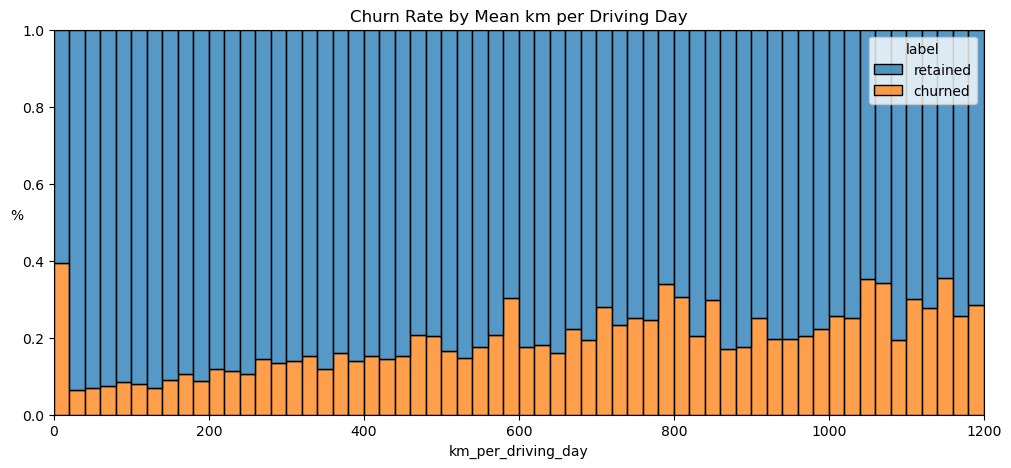

In [34]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20), # Limit km per driving day to 1200 km
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn Rate by Mean km per Driving Day');

The data suggests that the more a user drive in an average driving day, the more likely they are to churn. A further investigation can be done to find the reason why this is.

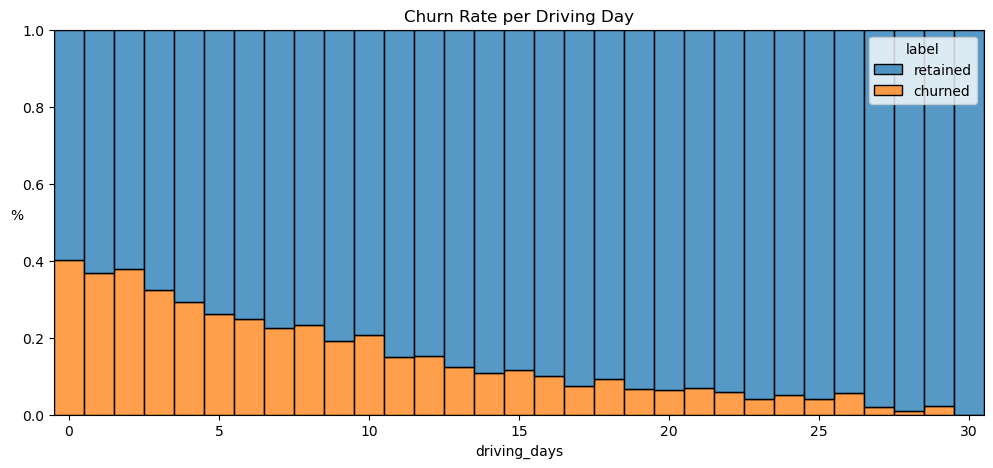

In [35]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn Rate per Driving Day');

The data suggests that users with more driving days in a month are more liklely to be retained.

#### **Device Usage Hypothesis Test**

Is there a statistically significant difference between the average number of drives for each device type?

In [36]:
# Map device types for hypothesis testing
map_dict = {'iPhone': 1, 'Android': 2}

df['device_type'] = df['device']
df['device_type'] = df['device_type'].map(map_dict)

df['device_type'].head(10)

C:\Users\oskar\AppData\Local\Temp\ipykernel_5944\1327813152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['device_type'] = df['device']
C:\Users\oskar\AppData\Local\Temp\ipykernel_5944\1327813152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['device_type'] = df['device_type'].map(map_dict)


0    2
1    1
2    2
3    1
4    2
5    1
6    1
7    1
8    2
9    1
Name: device_type, dtype: int64

In [37]:
df.groupby('device_type')['drives'].mean()

device_type
1    67.955324
2    66.076331
Name: drives, dtype: float64

The mean drives per device is close, with iPhone having a slightly higher average. However, this difference can arise from random sampling rather than being a real difference. To assess if this difference is statistically significant, a two-sample t-test will be conducted.

Hypotheses:

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.


Significance level is 5%

In [38]:
# Isolate drives columns for each device
iphone = df[df['device_type'] == 1]['drives']
android = df[df['device_type'] == 2]['drives']

# T-test
stats.ttest_ind(a=iphone, b=android, equal_var=False)

Ttest_indResult(statistic=1.649774209214806, pvalue=0.09901815978424397)

P-value is 16%, which is higher than the significance level of 5%. Therefore, there is no statistically significant difference in the average number of drives between drivers of each device type.

Is there a difference between the retention rates for each device type?

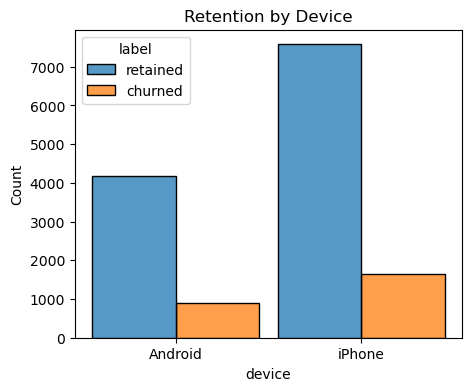

In [39]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by Device');

In [40]:
df['device'].value_counts(normalize=True)

iPhone     0.645256
Android    0.354744
Name: device, dtype: float64

In [41]:
iphone_retention = df[df['device'] == 'iPhone']
android_retention = df[df['device'] == 'Android']

In [42]:
iphone_retention['label'].value_counts(normalize=True)

retained    0.821731
churned     0.178269
Name: label, dtype: float64

In [43]:
android_retention['label'].value_counts(normalize=True)

retained    0.824458
churned     0.175542
Name: label, dtype: float64

The histogram and normalized retention values shows that there is no difference in retention rates between device types.

#### **Log Regression Analysis of Churning vs Retention**

In [44]:
df = df.drop('ID', axis=1)

In [45]:
# A professional driver determined somewhat arbitrarily
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [46]:
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].head(15)

,label,label2
0,retained,0
1,retained,0
2,retained,0
3,retained,0
4,retained,0
5,retained,0
6,retained,0
7,retained,0
8,retained,0
9,churned,1


Correlation between variables need to be checked.

In [47]:
df.corr(method='pearson')

C:\Users\oskar\AppData\Local\Temp\ipykernel_5944\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,device_type,professional_driver,label2
sessions,1.000000,0.996842,0.590216,0.006291,0.005493,0.005331,0.004018,-0.005656,0.023894,0.019483,-0.282210,-0.009238,0.454789,-0.014253,0.401479,0.038207
drives,0.996842,1.000000,0.588069,0.005848,0.004796,0.007011,0.003915,-0.005229,0.023608,0.019214,-0.285989,-0.009055,0.456167,-0.013632,0.403307,0.038714
total_sessions,0.590216,0.588069,1.000000,0.006061,0.000218,0.007749,0.001564,-0.001582,0.012507,0.009351,-0.177148,-0.015337,0.263258,-0.013073,0.234207,0.025069
n_days_after_onboarding,0.006291,0.005848,0.006061,1.000000,-0.004590,-0.006193,-0.005429,-0.010838,-0.009687,-0.007566,0.004034,0.011682,-0.000924,0.011000,0.003701,-0.129181
total_navigations_fav1,0.005493,0.004796,0.000218,-0.004590,1.000000,0.003176,-0.006331,0.005564,0.010716,0.010405,-0.004317,-0.000038,0.011462,0.000875,0.001366,0.055172
total_navigations_fav2,0.005331,0.007011,0.007749,-0.006193,0.003176,1.000000,0.000178,-0.005377,-0.004651,0.001108,0.007354,0.009056,0.003390,-0.000749,0.003586,0.019868
driven_km_drives,0.004018,0.003915,0.001564,-0.005429,-0.006331,0.000178,1.000000,0.697915,-0.003929,-0.006795,0.239769,0.355970,0.013882,0.001846,-0.001921,0.019189
duration_minutes_drives,-0.005656,-0.005229,-0.001582,-0.010838,0.005564,-0.005377,0.697915,1.000000,-0.003667,-0.006015,0.180585,0.246139,0.001983,0.004010,-0.009868,0.035642
activity_days,0.023894,0.023608,0.012507,-0.009687,0.010716,-0.004651,-0.003929,-0.003667,1.000000,0.947642,-0.005468,-0.398083,-0.321353,0.010509,0.453764,-0.303889
driving_days,0.019483,0.019214,0.009351,-0.007566,0.010405,0.001108,-0.006795,-0.006015,0.947642,1.000000,-0.004295,-0.408617,-0.331380,0.004208,0.469728,-0.294323


C:\Users\oskar\AppData\Local\Temp\ipykernel_5944\1179479373.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')


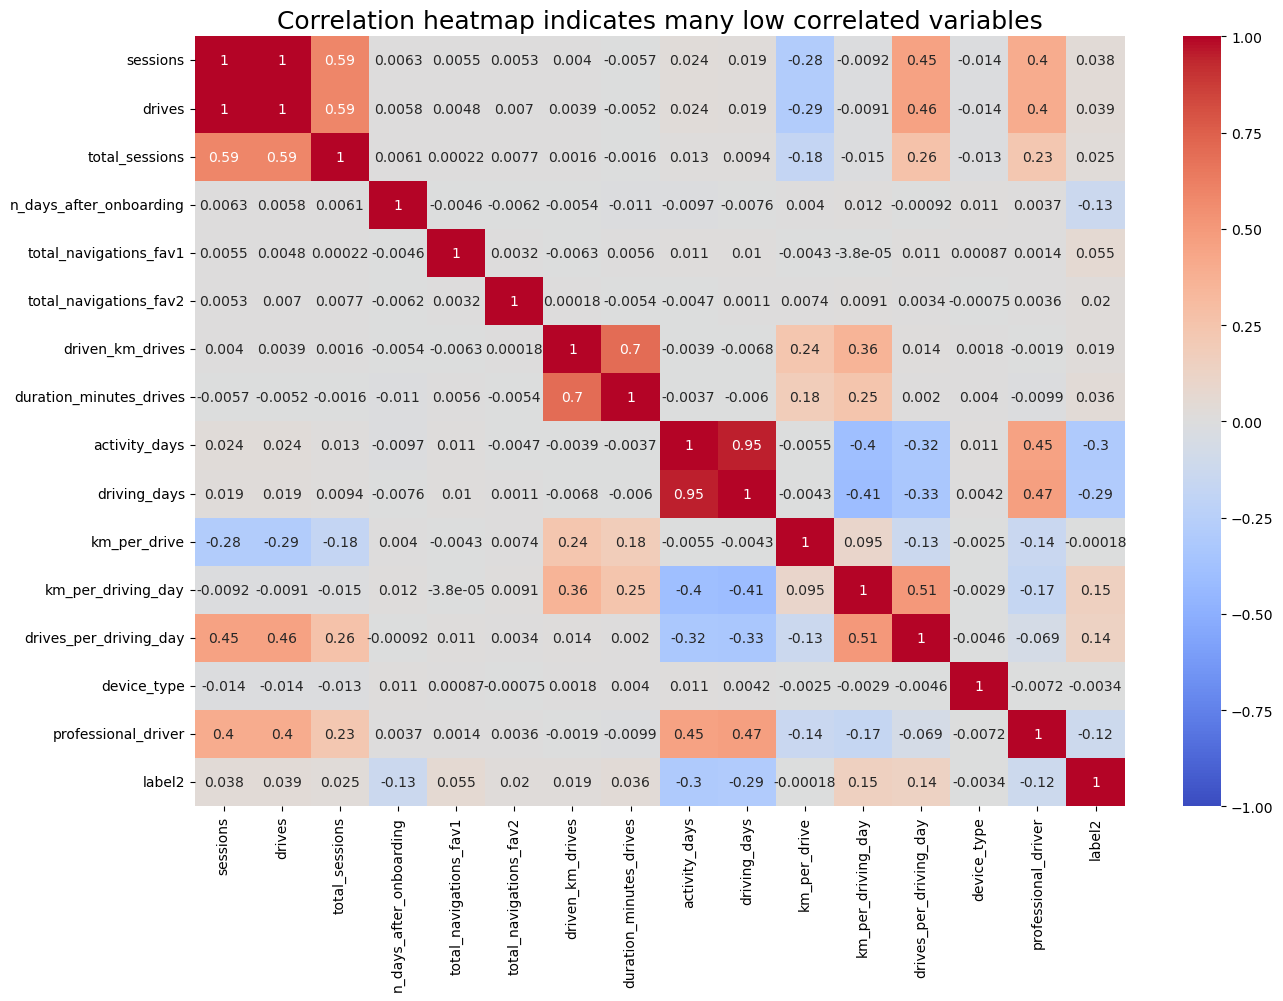

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

If Pearson correlation coefficient is greater than 0.8, then the variables are strongly multicollinear. 

Sessions and drives have a coeff of 1

Driving days and activity days have a coeff of 0.95

In [49]:
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].head(10)

,device,device2
0,Android,0
1,iPhone,1
2,Android,0
3,iPhone,1
4,Android,0
5,iPhone,1
6,iPhone,1
7,iPhone,1
8,Android,0
9,iPhone,1


In [50]:
# Isolating predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

In [51]:
# Isolating target variable
y = df['label2']

In [52]:
# Perform the train-test split, random state 42 for reproductability
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10719 entries, 3457 to 5153
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   drives                   10719 non-null  int64  
 1   total_sessions           10719 non-null  float64
 2   n_days_after_onboarding  10719 non-null  int64  
 3   total_navigations_fav1   10719 non-null  int64  
 4   total_navigations_fav2   10719 non-null  int64  
 5   driven_km_drives         10719 non-null  float64
 6   duration_minutes_drives  10719 non-null  float64
 7   activity_days            10719 non-null  int64  
 8   km_per_drive             10719 non-null  float64
 9   km_per_driving_day       10719 non-null  float64
 10  drives_per_driving_day   10719 non-null  float64
 11  device_type              10719 non-null  int64  
 12  professional_driver      10719 non-null  int32  
 13  device2                  10719 non-null  int32  
dtypes: float64(6), int32

In [54]:
X_train.describe()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_drive,km_per_driving_day,drives_per_driving_day,device_type,professional_driver,device2
count,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000,10719.000000
mean,67.616289,189.756477,1757.607613,121.494263,29.586249,4040.352290,1863.423547,15.548839,232.944067,582.801152,9.433755,1.353671,0.176136,0.646329
std,65.795884,136.077879,1009.129317,147.530662,45.191455,2504.186161,1453.092558,9.023389,631.016694,1040.696436,19.702776,0.478131,0.380953,0.478131
min,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,23.022685,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,20.000000,90.661523,878.000000,9.000000,0.000000,2218.510237,838.453780,8.000000,32.057732,136.879660,1.230769,1.000000,0.000000,0.000000
50%,48.000000,159.456754,1755.000000,71.000000,9.000000,3499.569869,1469.739056,16.000000,72.325946,273.900784,3.727273,1.000000,0.000000,1.000000
75%,94.000000,253.911551,2635.000000,178.000000,43.000000,5291.236195,2467.622110,23.000000,182.019296,557.290619,9.000000,2.000000,0.000000,1.000000
max,596.000000,1216.154633,3500.000000,1182.000000,415.000000,21183.401890,15851.727160,31.000000,15777.426560,15420.234110,395.000000,2.000000,1.000000,1.000000


In [55]:
model = LogisticRegression(max_iter=400)

model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [56]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001994
total_sessions             0.000274
n_days_after_onboarding   -0.000394
total_navigations_fav1     0.001025
total_navigations_fav2     0.001175
driven_km_drives          -0.000017
duration_minutes_drives    0.000083
activity_days             -0.104092
km_per_drive               0.000066
km_per_driving_day         0.000032
drives_per_driving_day    -0.000767
device_type               -0.002524
professional_driver       -0.001455
device2                   -0.001192
dtype: float64

In [57]:
model.intercept_

array([-0.00185769])

In [58]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.70338306, 0.29661694],
       [0.80893439, 0.19106561],
       [0.57469872, 0.42530128],
       ...,
       [0.58373064, 0.41626936],
       [0.85556377, 0.14443623],
       [0.92787989, 0.07212011]])

In [59]:
# Creating logit data for plotting
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

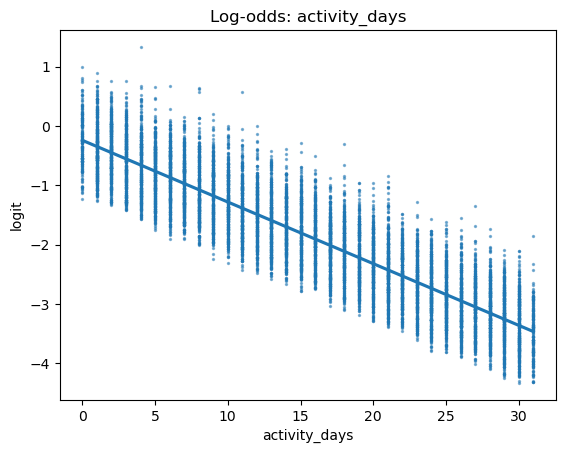

In [60]:
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

Figure shows linear relationship between X and logit, confirms assumptions.

Only one independent variable has been checked to be concise. In a larger analysis all predictor variables should be checked to confirm.

In [61]:
y_preds = model.predict(X_test)

In [62]:
model.score(X_test, y_test)

0.8217184438846907

The model accuracy is 0.82, which is good. However, accuracy may not be the best evaluation metric for this model so a confusion matrix will be produced, along with calculating recall and precision.

In [63]:
cm = confusion_matrix(y_test, y_preds)

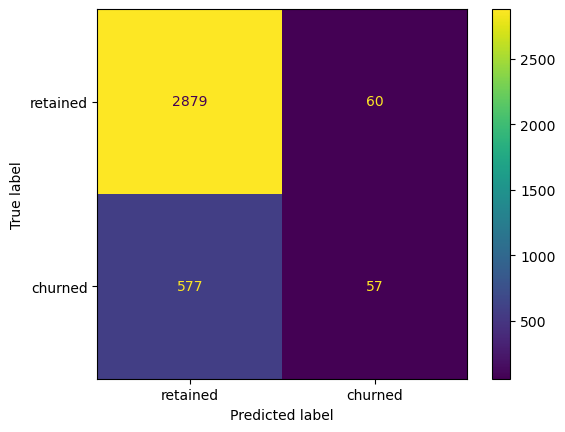

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [65]:
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.48717948717948717

In [66]:
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.08990536277602523

In [67]:
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2939
     churned       0.49      0.09      0.15       634

    accuracy                           0.82      3573
   macro avg       0.66      0.53      0.53      3573
weighted avg       0.77      0.82      0.77      3573



Overall, the model has decent precision but bad recall rate. This means that it makes a lot of false negative predictions and fails to capture users who will churn. This could be due to log regression being sensitive to outliers.

This highlights a flaw in the dataset, as it is not able to predict whether a user will churn or retain. This model should not be used to make key business decisions as it is not a strong enough predictor, but it can and should be used as a exploratory tool.

The multiple logistic regression model shows that activity days (and driving days due to its strong correlation to activity days) is the most significant predictor variable. This is not a surprise, as this was seen in the EDA stage.

The model could also be improved by creating more engineered predictor signals, such as the professional driver variable that was created. Predictor variables could also be scaled or a different combination of predictor variables can be used, to reduce noise from unpredictive variables.

#### **Machine Learning Analysis of Churning vs Retention**

Start with a bit more feature engineering 

In [68]:
df.head(10)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,device_type,professional_driver,label2,device2
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,2,1,0,0
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,1,0,0,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,2,0,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,1,0,0,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,2,1,0,0
5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,81.930791,9.363636,1,0,0,1
6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,228.224906,0.086957,1,0,0,1
7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,394.602623,1.750000,1,0,0,1
8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,132.585488,2.300000,2,0,0,0
9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,2014.486765,22.666667,1,0,1,1


In [69]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].describe()

count    14292.000000
mean         0.450057
std          0.286760
min          0.000000
25%          0.197506
50%          0.424643
75%          0.687342
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

In [70]:
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']
df['total_sessions_per_day'].describe()

count    14292.000000
mean         0.338238
std          1.320091
min          0.000298
25%          0.050855
50%          0.100482
75%          0.215183
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [71]:
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14292.000000
mean       190.744501
std        340.002807
min         72.013095
25%         90.654129
50%        122.101538
75%        193.235962
max      23642.920871
Name: km_per_hour, dtype: float64

In [72]:
df['percent_of_drives_to_favorite'] = (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']
df['percent_of_drives_to_favorite'].describe()

count    14292.000000
mean         1.674854
std          9.022437
min          0.000000
25%          0.206034
50%          0.652997
75%          1.642771
max        777.563629
Name: percent_of_drives_to_favorite, dtype: float64

In [73]:
# Splitting data into train, test and validation sets
X = df.drop(columns=['label', 'label2', 'device', 'drives_per_driving_day', 'device_type'])

y = df['label2']

# Random State 42 for reproductability
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25, random_state=42)

In [74]:
# Checking corrent number of train, validation and test observations
for x in [X_train, X_val, X_test]:
    print(len(x))

8574
2859
2859


In [75]:
# Instantiate random forest classifier
rf = RandomForestClassifier(random_state=42)

In [76]:
# Defining model parameters and scoring criteria
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [77]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 1min 34s
Wall time: 1min 35s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'f1', 'recall', 'accuracy'})

In [78]:
rf_cv.best_score_

0.12039473684210528

In [79]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [80]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [81]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.443783,0.120395,0.189091,0.816771


Still not the best score, see if it will be improved by XGBoost model

In [82]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [83]:
# Defining model parameters and scoring criteria
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [84]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 4min 11s
Wall time: 11.6 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'f1', 'recall', 'accuracy'})

In [85]:
xgb_cv.best_score_

0.16118421052631576

In [86]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

In [87]:
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.443783,0.120395,0.189091,0.816771
0,XGB cv,0.379924,0.161184,0.225725,0.804992


In [88]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [89]:
# Get validation scores for RF model and append to table
rf_val_preds = rf_cv.best_estimator_.predict(X_val)
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.443783,0.120395,0.189091,0.816771
0,XGB cv,0.379924,0.161184,0.225725,0.804992
0,RF val,0.462585,0.134122,0.207951,0.818818


In [90]:
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.443783,0.120395,0.189091,0.816771
0,XGB cv,0.379924,0.161184,0.225725,0.804992
0,RF val,0.462585,0.134122,0.207951,0.818818
0,XGB val,0.437186,0.171598,0.246459,0.813921


In [91]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.443783,0.120395,0.189091,0.816771
0,XGB cv,0.379924,0.161184,0.225725,0.804992
0,RF val,0.462585,0.134122,0.207951,0.818818
0,XGB val,0.437186,0.171598,0.246459,0.813921
0,XGB test,0.388889,0.165680,0.232365,0.805876


Validation and test score are close, apart from precision which declined noticably. However, the scores are within an acceptable range.

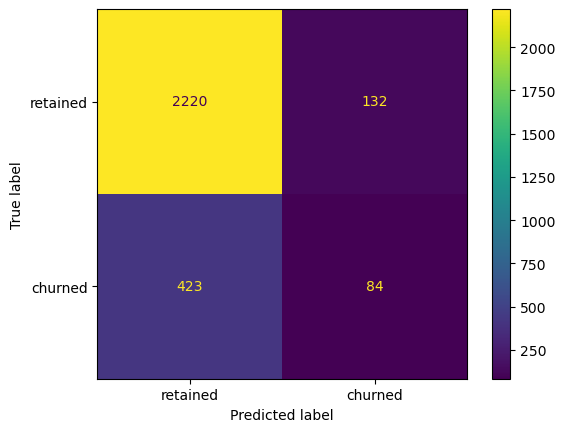

In [92]:
# Plot confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['retained', 'churned'])
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

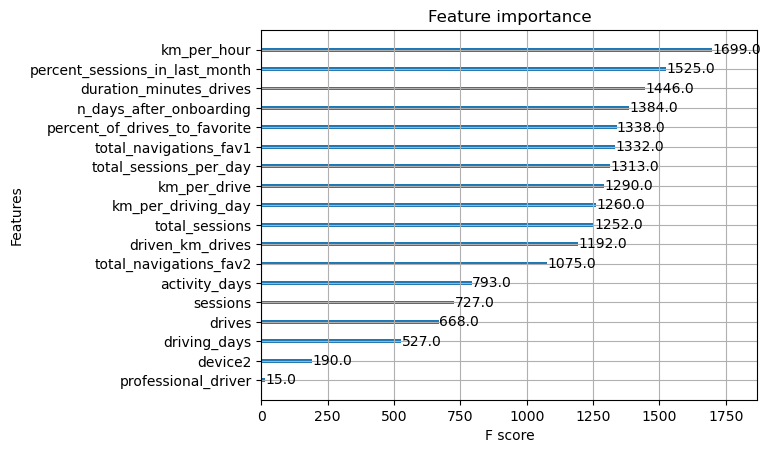

In [93]:
plot_importance(xgb_cv.best_estimator_)

Overall, the model should probably not be used to make key business due to its low scores across the board, apart from accuracy. The model should be used as a part of the EDA process to understand the importance of certain features in determining the likelyhood of a user churning. 

The feature importance plot shows that the best predictors are engineered predictors, suggesting that the performance of the model can be improved by adding more engineered features.